In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 100

In [96]:
def load_original_data():
    file=pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
    return file

In [97]:
ica_df=load_original_data()

In [98]:
ica_df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [99]:
numericals=ica_df._get_numeric_data()
numericals

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [100]:
cardinals=ica_df.select_dtypes('object')
cardinals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

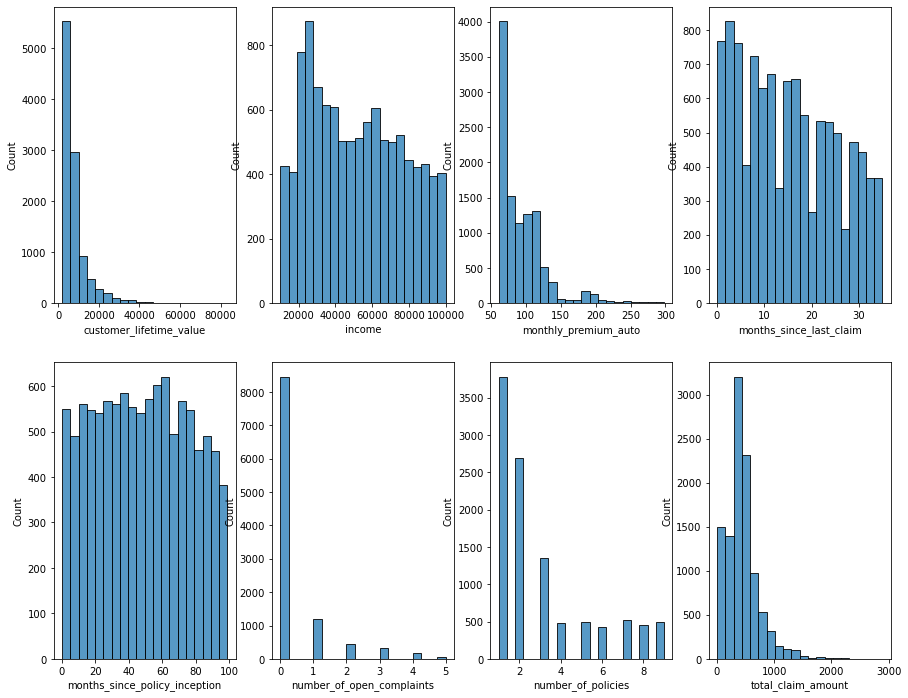

In [101]:
## Seaborn
#subplots
fig,ax=plt.subplots(2,4, figsize=(15,12))
#actual graph
sns.histplot((numericals['customer_lifetime_value']), bins=20, ax=ax[0,0])
sns.histplot((numericals['income']), bins=20, ax=ax[0,1])
sns.histplot((numericals['monthly_premium_auto']), bins=20, ax=ax[0,2])
sns.histplot((numericals['months_since_last_claim']), bins=20, ax=ax[0,3])
sns.histplot((numericals['months_since_policy_inception']), bins=20, ax=ax[1,0])
sns.histplot((numericals['number_of_open_complaints']), bins=20, ax=ax[1,1])
sns.histplot((numericals['number_of_policies']), bins=20, ax=ax[1,2])
sns.histplot((numericals['total_claim_amount']), bins=20, ax=ax[1,3])

Text(0.5, 0.98, 'numericals')

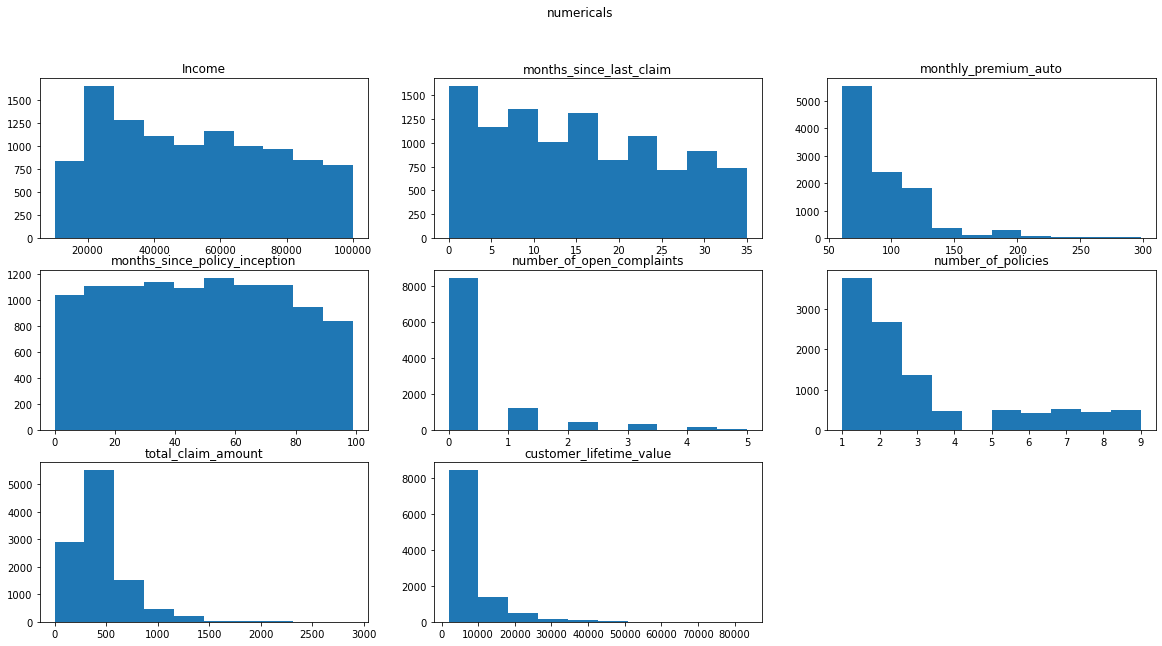

In [102]:
## Matplotlib
#resizing
plt.figure(figsize=(20,10))
#1st plot
plt.subplot(3,3,1)
plt.hist('income', data= numericals)
plt.title("Income")
#2nd plot
plt.subplot(3,3,2)
plt.hist('months_since_last_claim', data= numericals)
plt.title("months_since_last_claim")
#plt.plot(x,y1,color = '#80213F')
#3th plot
plt.subplot(3,3,3)
plt.hist('monthly_premium_auto', data= numericals)
plt.title("monthly_premium_auto")
#4th plot
plt.subplot(3,3,4)
plt.hist('months_since_policy_inception', data= numericals)
plt.title("months_since_policy_inception")
#5th plot
plt.subplot(3,3,5)
plt.hist('number_of_open_complaints', data= numericals)
plt.title("number_of_open_complaints")
#6th plot
plt.subplot(3,3,6)
plt.hist('number_of_policies', data= numericals)
plt.title("number_of_policies")
#7th plot
plt.subplot(3,3,7)
plt.hist('total_claim_amount', data= numericals)
plt.title("total_claim_amount")
#th plot
plt.subplot(3,3,8)
plt.hist('customer_lifetime_value', data= numericals)
plt.title("customer_lifetime_value")
#title
plt.suptitle("numericals")

In [103]:
#Do the distributions for different numerical variables look like a normal distribution

In [104]:
# the independent variables 
X = numericals[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                         feature       VIF
0        customer_lifetime_value  2.822793
1                         income  4.114033
2           monthly_premium_auto  6.892773
3  months_since_policy_inception  3.386280
4        months_since_last_claim  2.855476
5      number_of_open_complaints  1.171581
6             number_of_policies  2.329221


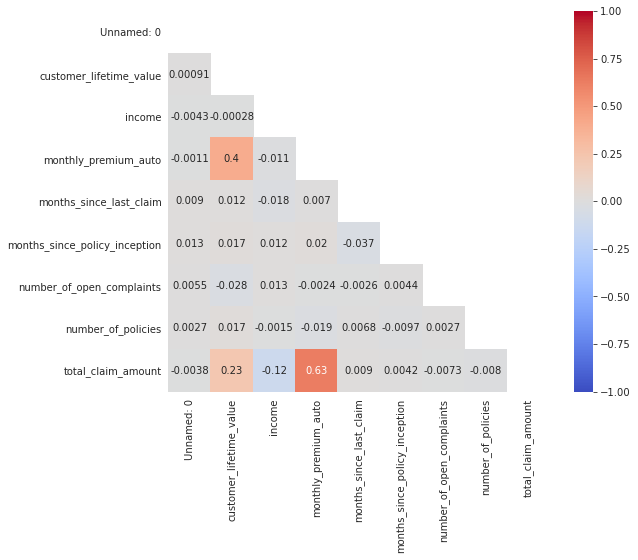

In [105]:
corr = numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [106]:
#total responses
response_df= cardinals['response'].value_counts()

In [107]:
response_df

no     9328
yes    1361
Name: response, dtype: int64

<BarContainer object of 2 artists>

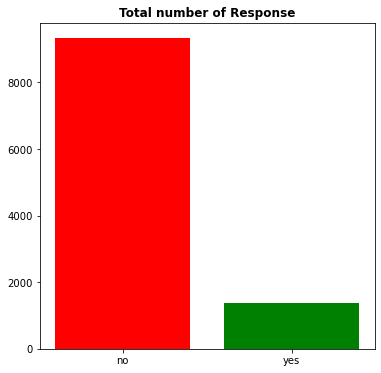

In [108]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (6,6))

# set title
ax3.set_title('Total number of Response', fontweight='bold')

# plot the bar chart
ax3.bar(response_df.index, response_df, color=('red','green'))

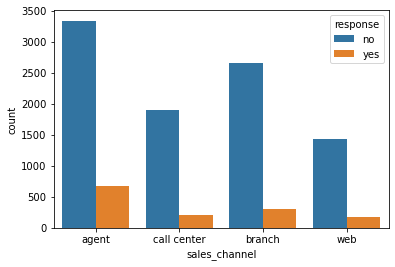

In [109]:
##response rate by sales channels
sns.countplot(x ='sales_channel', hue='response', data = cardinals)
 
# Show the plot
plt.show()

In [111]:
labels = ["very low", "low", "medium", "high", "very high"]
tca_binned= pd.DataFrame(pd.cut(ica_df['total_claim_amount'], bins=5, labels = labels))

In [112]:
tca_binned

,total_claim_amount
0,very low
1,low
2,very low
3,very low
4,low
...,...
10684,medium
10685,very low
10686,very low
10687,low


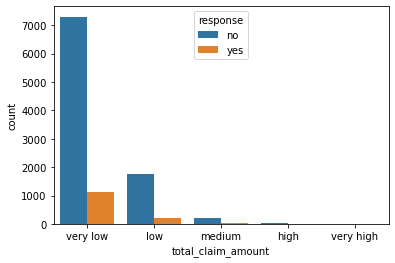

In [116]:
sns.countplot(x =tca_binned['total_claim_amount'], hue=cardinals['response'])
 
# Show the plot
plt.show()

In [117]:
inc_binned= pd.DataFrame(pd.cut(ica_df['income'], bins=5, labels = labels))
inc_binned

,income
0,medium
1,very low
2,very low
3,medium
4,very low
...,...
10684,high
10685,medium
10686,low
10687,high


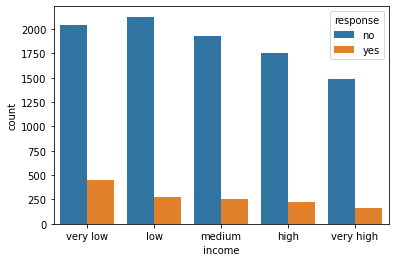

In [118]:
sns.countplot(x =inc_binned['income'], hue=cardinals['response'])
plt.show()

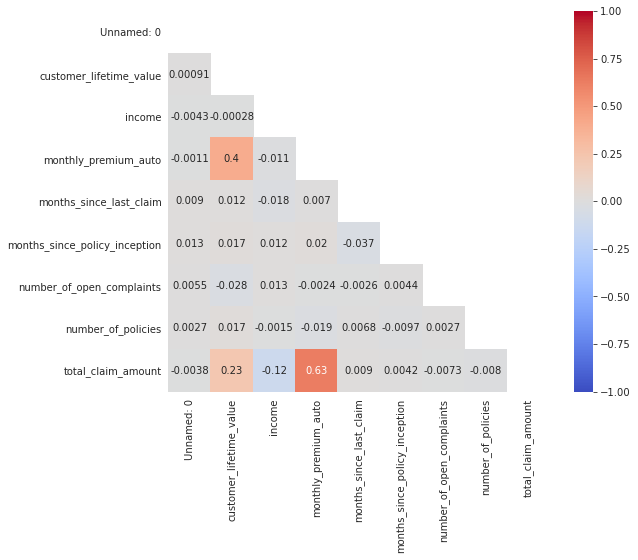

In [119]:
corr = numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)